# Gerador de Captcha (Nível 1)

- Python 3.5, TensorFlow 1.2, Keras 2.0

In [ ]:
pip install captcha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 4.2 MB/s 


In [ ]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
import string
characters = string.digits + string.ascii_uppercase
print(characters)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


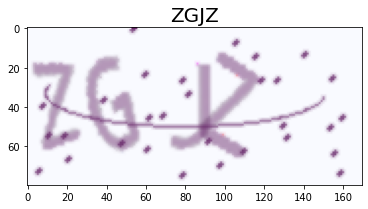

Image Shape : (80, 170, 3)


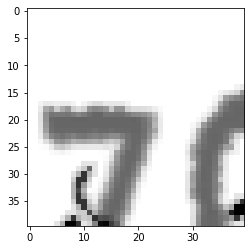

In [ ]:
width, height = 170, 80

n_len = 4

n_class = len(characters)

generator = ImageCaptcha(width, height)
random_str = ''.join([random.choice(characters) for i in range(n_len)])
img = generator.generate_image(random_str)
plt.imshow(img)
plt.title(random_str, fontsize=20)
plt.show()

img_matrix = np.array(img)
print("Image Shape :", img_matrix.shape)
plt.imshow(img_matrix[:40, :40, 0], cmap='gray')
plt.show()

LUAO


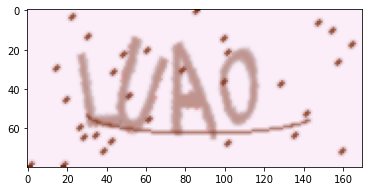

In [ ]:
# X store image batches
# Y store text batches
def generate_batch(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    Y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    img_gen = ImageCaptcha(width, height)
    
    while True:
        for pic_id in range(batch_size):
            random_str = ''.join([random.choice(characters) for i in range(n_len)])
            X[pic_id] = img_gen.generate_image(random_str) 
            for i, ch in enumerate(random_str):
                Y[i][pic_id, :] = 0                      # Reset
                Y[i][pic_id, characters.find(ch)] = 1    # Set (One-hot Encoding Label)
        yield X, Y

        
def decode(y):
    y = np.argmax(np.array(y), axis=2)
    y = y[:,0]
    return ''.join([characters[x] for x in y])


X, y = next(generate_batch(10))
plt.imshow(X[0])
print(decode(y))

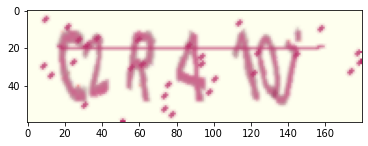

In [ ]:
generator = ImageCaptcha(180, 60, font_sizes=[36])
img = generator.generate_image("c2R410j")
plt.imshow(img)
plt.show()